## Problem Statement
This case study is to predict the Ammonium in the river water in ukraine 

## About to the data 

**Ammonium ions concentration is measured in mg/cub. dm (ie milligrams in the cubic decimeter)**

**Id** - the unique id of a given monthly averaged data

**target** - values of monthly averaged data of NH4 in target station, mg/cub. dm

**1-7** - values of monthly averaged data of NH4 in stations 1-7 (located upstream) mg/cub. dm

# 1 Import Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.svm import LinearSVR

from sklearn.metrics import mean_squared_error,r2_score

# 2 Read Data 

In [2]:
df = pd.read_csv(r"C:\Users\DELL-PC\Downloads\archive (3)\Data for Ammonium prediction.csv")
df

,Id,target,1,2,3,4,5,6,7
0,0,1.10,0.69,1.04,NaN,NaN,NaN,NaN,NaN
1,3,0.41,0.71,0.72,NaN,NaN,NaN,NaN,NaN
2,4,1.70,2.21,2.21,NaN,NaN,NaN,NaN,NaN
3,5,0.62,0.60,0.68,NaN,NaN,NaN,NaN,NaN
4,6,0.60,0.60,0.90,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
142,208,0.44,0.38,1.90,NaN,NaN,NaN,NaN,NaN
143,211,0.30,0.37,0.50,NaN,NaN,NaN,NaN,NaN
144,212,1.50,2.40,3.60,NaN,NaN,NaN,NaN,NaN
145,213,0.52,0.31,0.50,NaN,NaN,NaN,NaN,NaN


# 3 Understand and Prepare the data 

## 3.1 Data Types and Data dimensions 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      147 non-null    int64  
 1   target  147 non-null    float64
 2   1       145 non-null    float64
 3   2       145 non-null    float64
 4   3       32 non-null     float64
 5   4       31 non-null     float64
 6   5       33 non-null     float64
 7   6       37 non-null     float64
 8   7       37 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 10.5 KB


In [4]:
df.shape

(147, 9)

## 3.2 Missing values 

In [5]:
df.isnull().sum()/len(df)*100

Id         0.000000
target     0.000000
1          1.360544
2          1.360544
3         78.231293
4         78.911565
5         77.551020
6         74.829932
7         74.829932
dtype: float64

**In above output we can clearly see that column 3 to 7 has more than 74%**
**so we will remove the column 3 to 7**

In [6]:
null_value=df.columns[df.isna().sum()/len(df)*100 >74]
df.drop(null_value,axis=1,inplace=True)

In [7]:
df =df.dropna().reset_index(drop=True)

## 3.3 Check duplicate Values 

In [8]:
df.duplicated().sum()

0

in this data we don't have any duplicate values 

## 3.4 Data Correction 

In [9]:
df.drop('Id',axis=1,inplace=True)

In [10]:
df

,target,1,2
0,1.10,0.69,1.04
1,0.41,0.71,0.72
2,1.70,2.21,2.21
3,0.62,0.60,0.68
4,0.60,0.60,0.90
...,...,...,...
139,0.44,0.38,1.90
140,0.30,0.37,0.50
141,1.50,2.40,3.60
142,0.52,0.31,0.50


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  144 non-null    float64
 1   1       144 non-null    float64
 2   2       144 non-null    float64
dtypes: float64(3)
memory usage: 3.5 KB


# 4 EDA(Exploratory Data Analysis) 

## 4.1 Statistical Summary 

In [12]:
df.describe()

,target,1,2
count,144.000000,144.000000,144.000000
mean,0.580486,0.588264,0.664653
std,0.434269,0.463758,0.592069
min,0.040000,0.040000,0.020000
25%,0.250000,0.227500,0.220000
50%,0.425000,0.415000,0.455000
75%,0.827500,0.802500,0.920000
max,1.930000,2.400000,3.600000


## 4.2 Finding Outliers 

<function matplotlib.pyplot.show(close=None, block=None)>

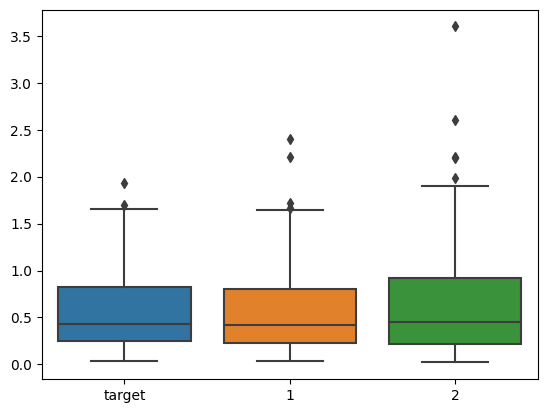

In [13]:
sns.boxplot(df)
plt.show

## 4.3 univariate analysis 

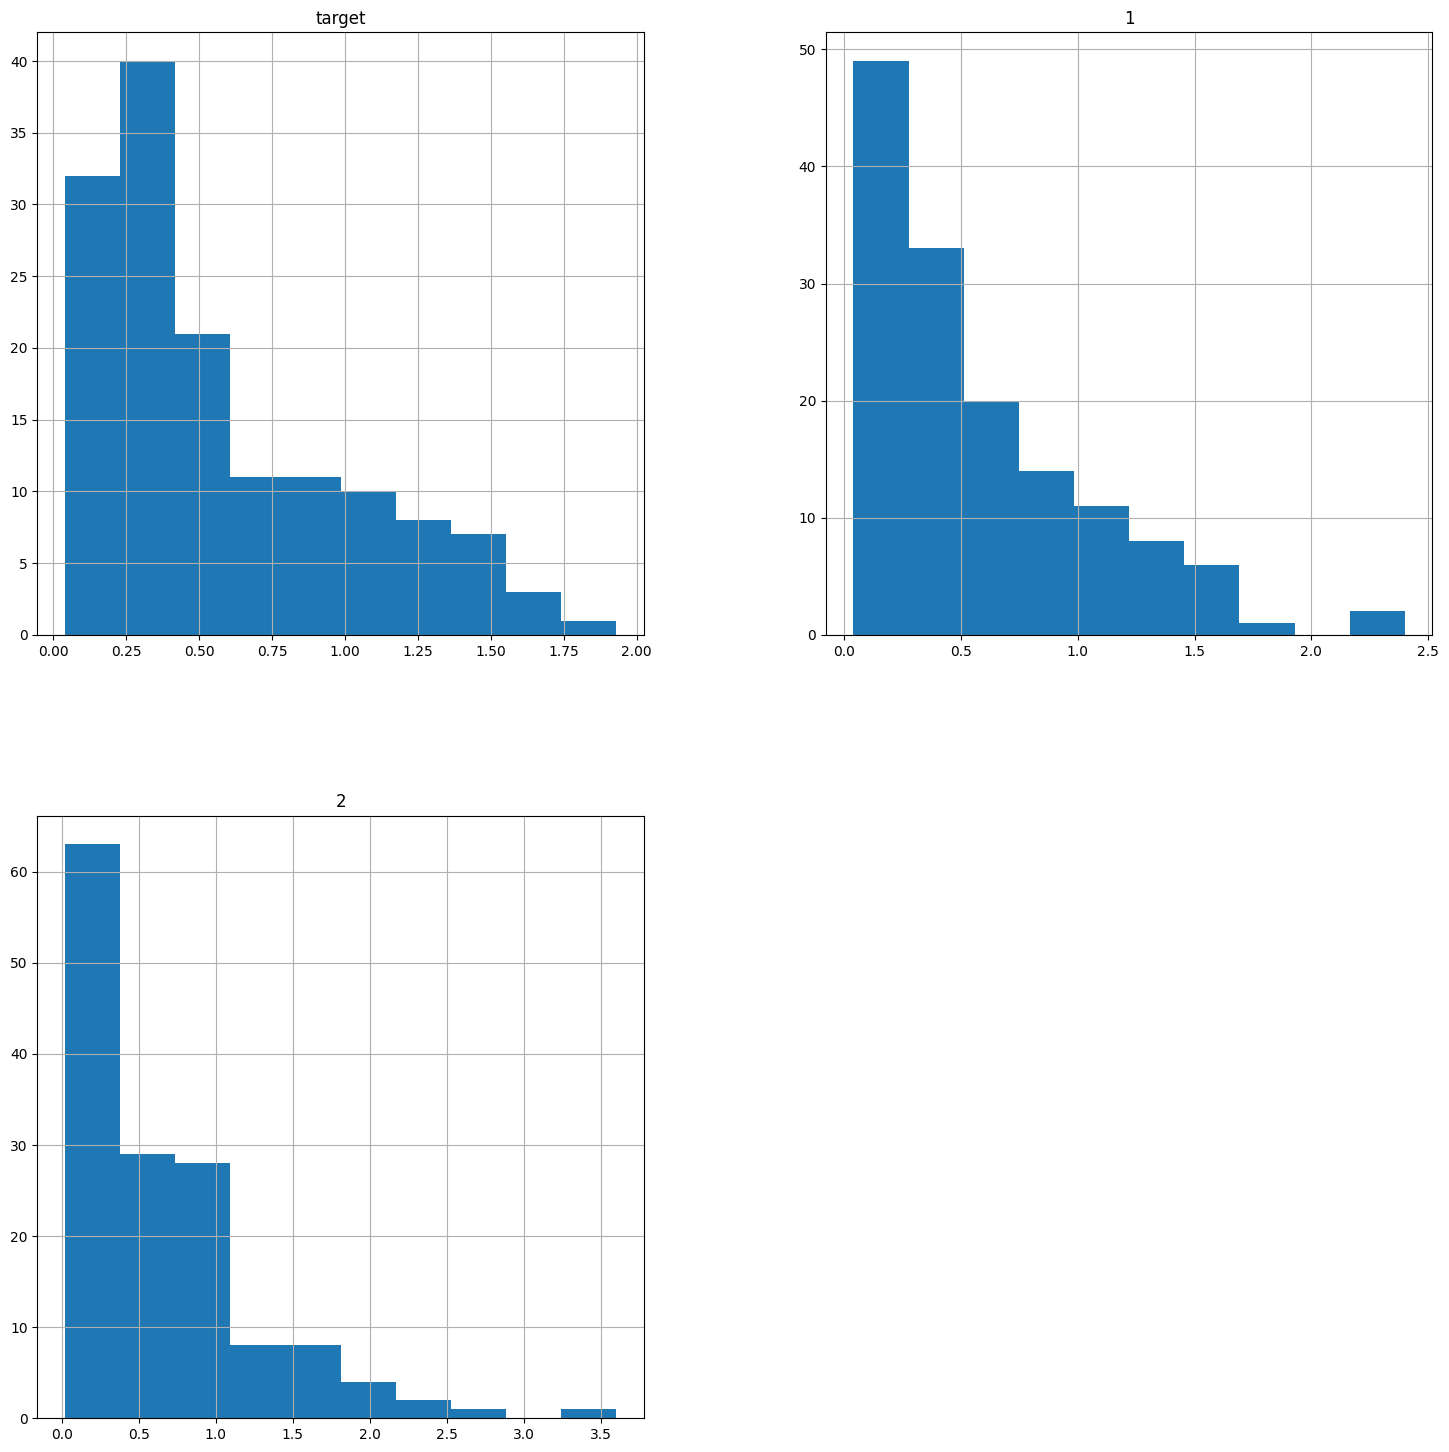

In [14]:
fig = df.hist(figsize = (18,18))

we can see that our data is not normally distributed

## 4.4 Multivariate Analysis

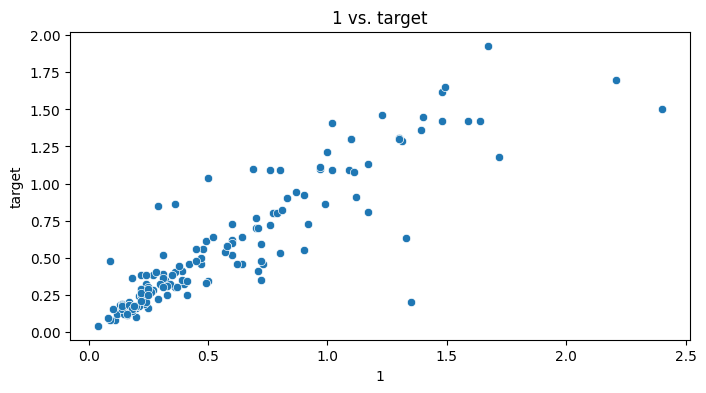

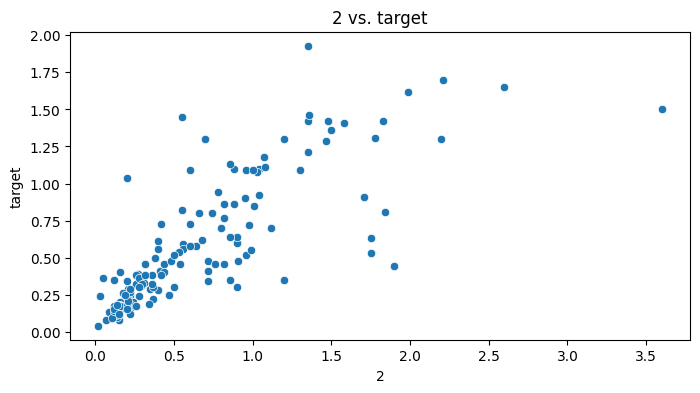

In [15]:
target_variable = 'target'
for col in df.columns:
    if col != target_variable:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=col, y=target_variable, data=df)
        plt.title(f'{col} vs. {target_variable}')
        plt.show()

By above output station 1 and 2 has linear relation with target variable 

## 4.5 Correlation

In [16]:
corr = df.corr()
corr

,target,1,2
target,1.000000,0.891038,0.788487
1,0.891038,1.000000,0.832721
2,0.788487,0.832721,1.000000


<Axes: >

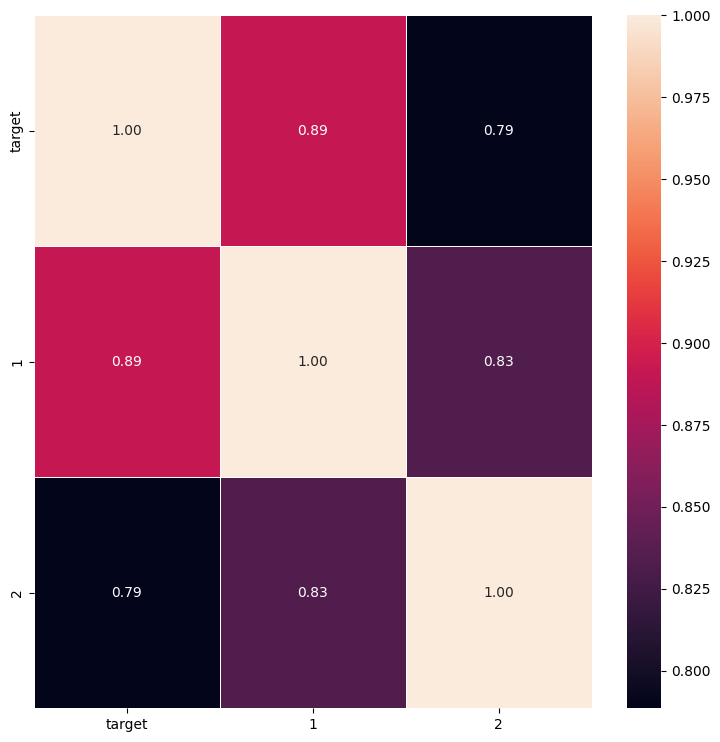

In [17]:
fig,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

# 5 Data Preprocessing 

## 5.1 Standardise Data

In [18]:
X = df.drop('target',axis=1)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [20]:
X = scaler.fit_transform(scaled_data)
x = pd.DataFrame(X)


In [21]:
Y = df['target']
Y

0      1.10
1      0.41
2      1.70
3      0.62
4      0.60
       ... 
139    0.44
140    0.30
141    1.50
142    0.52
143    0.17
Name: target, Length: 144, dtype: float64

## 5.2 Transform the data 

In [22]:
pt = PowerTransformer(method='yeo-johnson') 

values=df[['target','1','2']]
pt.fit(values)
yeoj_transform=pt.transform(values)
transformed_data=pd.DataFrame(data=yeoj_transform, columns=['target','1','2'])
transformed_data.head()

,target,1,2
0,1.250062,0.582208,0.971108
1,-0.167152,0.623088,0.492447
2,1.793517,1.998896,1.810258
3,0.425496,0.381783,0.417164
4,0.377368,0.381783,0.785224


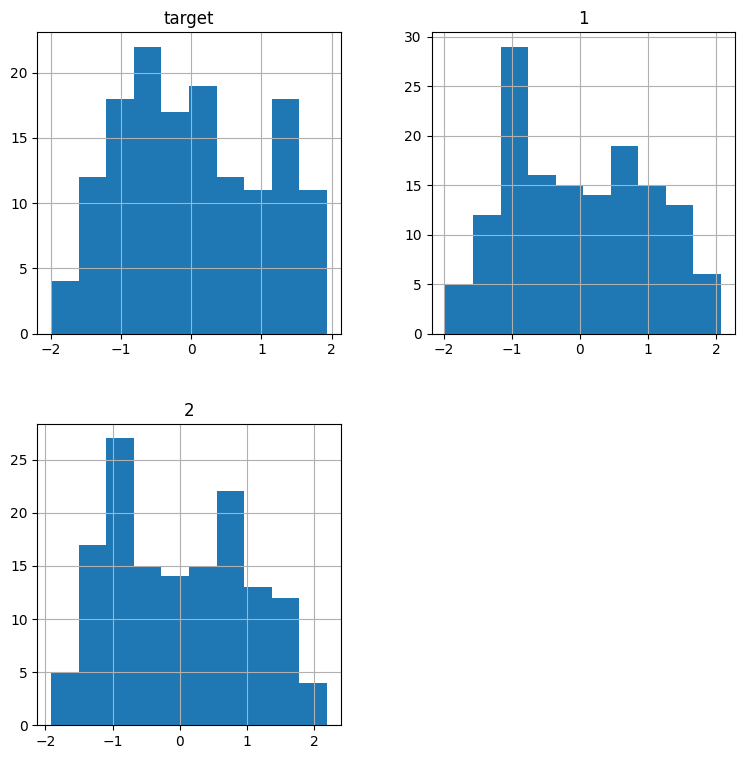

In [23]:
fig = transformed_data.hist(figsize = (9,9))

## 5.3 Split the data 

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,Y, train_size=0.8,random_state=100)

# 6 MODELING

In [25]:
result = pd.DataFrame({'model' : [ 'Linear Regression','Linear Regression with transform data','Decision Tree Regressor', 
                                  'Random Forest Regressor', 'XGBoost Regressor','Support vector regressor'], 
                       'r2_on_test': 0, 'r2_on_train': 0,'MSE':0})
result

,model,r2_on_test,r2_on_train,MSE
0,Linear Regression,0,0,0
1,Linear Regression with transform data,0,0,0
2,Decision Tree Regressor,0,0,0
3,Random Forest Regressor,0,0,0
4,XGBoost Regressor,0,0,0
5,Support vector regressor,0,0,0


## 6.1 Linear Regression

In [26]:
# training the model
LR = LinearRegression()
LR_model = LR.fit(x_train,y_train)

# prediction on test data 
y_test_lr = LR_model.predict(x_test)

# Accuracy of model
r2_score_accuracy = round(r2_score(y_test, y_test_lr)*100, 1)
print(f'Accuracy of Linear Regression model testing is {r2_score_accuracy}')
MSE = mean_squared_error(y_test,y_test_lr)
print(f'mean_squared_error of Linear Regression model is {MSE}')
result.loc[result['model'] == 'Linear Regression',['r2_on_test','MSE']]= r2_score_accuracy,MSE

Accuracy of Linear Regression model testing is 80.7
mean_squared_error of Linear Regression model is 0.03954511358823756


## Check overfitting 

In [27]:
# Prediction on train data 
y_train_lr = LR_model.predict(x_train)

# Accuracy of model on  train data 
r2_score_acc_train = round(r2_score(y_train, y_train_lr)*100,1)
print(f'Accuracy of Linear Regression  model prediction for train dataset is {r2_score_acc_train}')
result.loc[result['model'] == 'Linear Regression', 'r2_on_train'] = r2_score_acc_train

Accuracy of Linear Regression  model prediction for train dataset is 79.7


## 6.2 Linear Regression with transform data

In [28]:
X1=transformed_data.drop('target',axis=1)
Y1=transformed_data['target']

In [29]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,Y1, train_size=0.8,random_state=100)

In [30]:
# training the model
LR = LinearRegression()
LR_model = LR.fit(x1_train,y1_train)

# prediction on test data 
y1_test_lr = LR_model.predict(x1_test)

# Accuracy of model
r2_score_accuracy = round(r2_score(y1_test, y1_test_lr)*100, 1)
print(f'Accuracy of Linear Regression with transform data  model testing is {r2_score_accuracy}')
MSE = mean_squared_error(y1_test,y1_test_lr)
print(f'mean_squared_error of Linear Regression with transform data model is {MSE}')
result.loc[result['model'] == 'Linear Regression with transform data',['r2_on_test','MSE']]= r2_score_accuracy,MSE

Accuracy of Linear Regression with transform data  model testing is 87.5
mean_squared_error of Linear Regression with transform data model is 0.13252251695962627


In [31]:
# Prediction on train data 
y1_train_lr = LR_model.predict(x1_train)

# Accuracy of model on  train data 
r2_score_acc_train = round(r2_score(y1_train, y1_train_lr)*100,1)
print(f'Accuracy of Linear Regression  model prediction for train dataset is {r2_score_acc_train}')
result.loc[result['model'] == 'Linear Regression with transform data', 'r2_on_train'] = r2_score_acc_train

Accuracy of Linear Regression  model prediction for train dataset is 83.7


## 6.3 Decision Tree With GridSearchCV

In [32]:
decision_tree = DecisionTreeRegressor()
param_grid = {'min_samples_leaf': [i for i in range(5,10)], 'max_depth': [i for i in range(3,12)]}
cv_train = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)

# Training model
decision_tree_CV = GridSearchCV(decision_tree, param_grid=param_grid, cv=cv_train, verbose=False)
decision_tree_CV.fit(x_train, y_train)
print(decision_tree_CV.best_params_)

# Prediction for testing data
y_test_dt = decision_tree_CV.predict(x_test)

# Accuracy of model
r2_score_accuracy = round(r2_score(y_test, y_test_dt)*100, 1)
print(f'Accuracy of DecisionTreeRegressor model testing is {r2_score_accuracy}')

# MSE and Save to result dataframe
MSE = mean_squared_error(y_test,y_test_dt)
print(f'mean_squared_error of Decision Tree Regressor  model  is {MSE}')
result.loc[result['model'] =='Decision Tree Regressor',['r2_on_test','MSE']]= r2_score_accuracy,MSE

{'max_depth': 6, 'min_samples_leaf': 5}
Accuracy of DecisionTreeRegressor model testing is 82.8
mean_squared_error of Decision Tree Regressor  model  is 0.0352635427392245


## check overfitting 

In [33]:
# Prediction for training data 
y_train_dt = decision_tree_CV.predict(x_train)

# Accuracy of model on traing data 
r2_score_acc_train = round(r2_score(y_train, y_train_dt)*100,1)
result.loc[result['model'] == 'Decision Tree Regressor', 'r2_on_train'] = r2_score_acc_train
print(f'Accuracy of DecisionTreeRegressor model prediction for train dataset is {r2_score_acc_train}')

Accuracy of DecisionTreeRegressor model prediction for train dataset is 87.4


## 6.4 Random Forest 

In [34]:
rf = RandomForestRegressor()
param_grid = {'n_estimators': [10, 100, 500], 'min_samples_leaf': [i for i in range(5,10)], 
              'max_features': [1], 'max_depth': [i for i in range(4,6)] }

# Training model
rf_CV = GridSearchCV(rf, param_grid=param_grid, cv=cv_train, verbose=False)
rf_CV.fit(x_train, y_train)
print(rf_CV.best_params_)

# Prediction for testing data
y_test_rf = rf_CV.predict(x_test)

# Accuracy of model
r2_score_acc = round(r2_score(y_test, y_test_rf)*100,1)
print(f'Accuracy of RandomForestRegressor model testing is {r2_score_accuracy}')

# MSE and Save to result dataframe
MSE = mean_squared_error(y_test,y_test_rf)
print(f'mean_squared_error of Random Forest Regressor model testing is {MSE}')
result.loc[result['model'] =='Random Forest Regressor',['r2_on_test','MSE']]= r2_score_accuracy,MSE

{'max_depth': 4, 'max_features': 1, 'min_samples_leaf': 6, 'n_estimators': 10}
Accuracy of RandomForestRegressor model testing is 82.8
mean_squared_error of Random Forest Regressor model testing is 0.040013335000430444


## check overfitting 


In [35]:
# Prediction for training data
y_train_rf =rf_CV.predict(x_train)

# Accuracy of model on train data
r2_score_acc_train = round(r2_score(y_train, y_train_rf)*100,1)
result.loc[result['model'] == 'Random Forest Regressor', 'r2_on_train'] = r2_score_acc_train
print(f'Accuracy of RandomForestRegressor model prediction for train dataset is {r2_score_acc_train}')

Accuracy of RandomForestRegressor model prediction for train dataset is 82.8


## 6.5 XGBOOST

In [36]:
xgb = XGBRegressor()
param_grid = {'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

# Training model
xgb_CV = GridSearchCV(xgb, param_grid=param_grid, cv=cv_train, verbose=False)
xgb_CV.fit(x_train, y_train)
print(xgb_CV.best_params_)

# Prediction for testing  data
y_test_xgb = xgb_CV.predict(x_test)

# Accuracy of model
r2_score_accuracy = round(r2_score(y_test, y_test_xgb)*100, 1)
print(f'Accuracy of XGBRegressor model testing is {r2_score_accuracy}')

# MSE and save to result dataframe 
MSE = mean_squared_error(y_test,y_test_rf)
print(f'mean_squared_error of XGBoost Regressor model  is {MSE}')
result.loc[result['model'] == 'XGBoost Regressor',['r2_on_test','MSE']]= r2_score_accuracy,MSE

{'colsample_bytree': 0.7, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7}
Accuracy of XGBRegressor model testing is 65.6
mean_squared_error of XGBoost Regressor model  is 0.040013335000430444


## check overfitting

In [37]:
# Prediction for training data
y_train_xgb = xgb_CV.predict(x_train)

# Accuracy of model on train data 

r2_score_acc_train = round(r2_score(y_train, y_train_xgb)*100,1)
result.loc[result['model'] == 'XGBoost Regressor', 'r2_on_train'] = r2_score_acc_train
print(f'Accuracy of XGBRegressor model prediction for train dataset is {r2_score_acc_train}')

Accuracy of XGBRegressor model prediction for train dataset is 98.6


## 6.6 Support vector regressor 

In [38]:
# Train the model
SVR = LinearSVR()
SVR_model = SVR.fit(x_train,y_train)

# prediction for testing data 
y_test_svr = SVR_model.predict(x_test)

# Accuracy of model 
r2_score_accuracy = round(r2_score(y_test, y_test_svr)*100, 1)
print(f'Accuracy of Support vector regressor testing is {r2_score_accuracy}')

# MSE and save to result dataframe 
MSE = mean_squared_error(y_test,y_test_svr)
print(f'mean_squared_error of Support vector regressor model  is {MSE}')
result.loc[result['model'] == 'Support vector regressor',['r2_on_test','MSE']]= r2_score_accuracy,MSE

Accuracy of Support vector regressor testing is 81.6
mean_squared_error of Support vector regressor model  is 0.03773588231605045


C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## Check Overfitting 

In [39]:
#Prediction on training data
y_train_svr= SVR_model.predict(x_train)

# Accuracy of model on training data 
r2_score_acc_train = round(r2_score(y_train,y_train_svr)*100,1)
print(f'Accuracy of Support vector regressor model prediction for train dataset is {r2_score_acc_train}')
# Save to dataframe 
result.loc[result['model'] == 'Support vector regressor', 'r2_on_train'] = r2_score_acc_train


Accuracy of Support vector regressor model prediction for train dataset is 77.2


# 7. Model Comparision

In [40]:
result

,model,r2_on_test,r2_on_train,MSE
0,Linear Regression,80.7,79.7,0.039545
1,Linear Regression with transform data,87.5,83.7,0.132523
2,Decision Tree Regressor,82.8,87.4,0.035264
3,Random Forest Regressor,82.8,82.8,0.040013
4,XGBoost Regressor,65.6,98.6,0.040013
5,Support vector regressor,81.6,77.2,0.037736


**It can be seen from the result tabulation, that accuracy measures for the Linear Regression with transform data  is better than other model**